In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm

import numpy as np

In [2]:
%load_ext autoreload
%autoreload 1

In [3]:
%aimport special
%aimport optim
%aimport lossfuncs

## n2

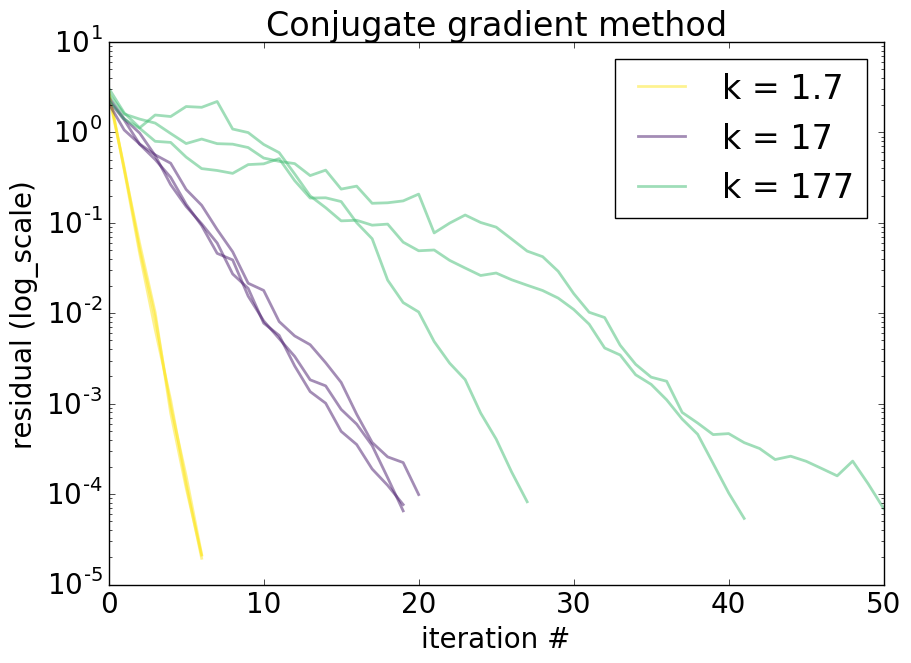

In [4]:
n = 100
matr_num = 3
plt.figure(figsize=(10, 7))
plt.rcParams.update({'font.size': 20})
for k in [1.7, 17, 177]:
    for i in range(matr_num):
        A = special.gen_symm_matr(k, n)
        b = np.random.randn(n)

        ans = optim.cg(lambda x: np.dot(A, x), b, np.zeros(n), trace=True)
        plt.semilogy(ans[2]['norm_r'], label='k = %s' % k if i == 0 else "",
                     c=cm.viridis(k), linewidth=2, alpha=0.5)

plt.title('Conjugate gradient method')
plt.xlabel('iteration #')
plt.ylabel('residual (log_scale)')
plt.legend(loc='best', )
plt.show()

## n4

In [5]:
def logloss(w, X, y, reg_coef):
    A = -y[:, np.newaxis] * X
    return np.logaddexp(0, A.dot(w)).mean() + reg_coef * np.dot(w, w) / 2

In [6]:
n = 100
d = 10
k = 3
w = np.random.rand(k, d)
X = np.random.rand(n, d)
# X[X > 0.1] = 0
y = np.ones(n)
y[np.random.rand(n) > 0.5] = -1

In [7]:
for i in range(k):
    tmp1 = lossfuncs.logistic(w[i], X, y, 1)
    tmp2 = special.grad_finite_diff(lambda x: logloss(x, X, y, 1), w[i])
    print(np.sum(tmp1[1] - tmp2) < 1e-5)

True
True
True


In [8]:
for i in range(k):
    v = np.random.rand() * w[i]
    tmp1 = lossfuncs.logistic_hess_vec(w[i], v, X, y, 1)
    tmp2 = special.hess_vec_finite_diff(lambda x: logloss(x, X, y, 1), w[i], v)
    print(np.sum(tmp1 - tmp2) < 1e-4)

True
True
True


In [9]:
n = 10
matr_num = 3
k = 17
A = special.gen_symm_matr(k, n)
b = np.random.randn(n)

def func(x):
    return (
        0.5 * x.dot(A.dot(x)) - x.dot(b),
        A.dot(x) - b
    )

def hess_vec(x, v):
    return np.dot(A, v)

ans1 = optim.ncg(func, np.zeros(n))
ans2 = optim.cg(lambda x: hess_vec(0, x), b, np.zeros(n))
ans3 = optim.hfn(func, np.zeros(n), hess_vec)

In [10]:
ans1

(array([ 0.78092763,  0.56866373,  0.24434262, -1.22730675, -0.22015273,
         0.24387808,  0.2485074 , -0.93344408,  0.19166316,  0.12876501]),
 -2.6404632020723939,
 0)

In [11]:
ans2

(array([ 0.78092763,  0.56866373,  0.24434262, -1.22730675, -0.22015273,
         0.24387808,  0.2485074 , -0.93344408,  0.19166316,  0.12876501]), 0)

In [12]:
ans3

(array([ 0.78093308,  0.56864655,  0.2443409 , -1.22724542, -0.22016109,
         0.24384656,  0.24851799, -0.9333637 ,  0.19162295,  0.12872596]),
 -2.6404631942845458,
 0)

In [13]:
def rosenbrock(x):
    x, y = x
    return (
        (1 - x) ** 2 + 100 * (y - x ** 2) ** 2,
        np.array([2 * x * (1 - 200 * (y - x ** 2)) - 2,
                  200 * (y - x ** 2)])
    )

def rosenbrock_hess(x, v):
    x, y = x
    return (
        np.array([
            [1200 * x ** 2 - 400 * y + 2, -400 * x],
            [-400 * x, 200],
        ]).dot(v)
    )

In [14]:
x, f, st, hist = optim.hfn(rosenbrock, np.array([10.0, 20.0]), rosenbrock_hess, max_iter=5000, trace=True)

In [15]:
x, f, st, hist['norm_g'].size

(array([ 1.00002272,  1.00004532]), 5.1778745642185902e-10, 0, 797)